In [2]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
import urllib2
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Loading Vulcan data
vulcan = pd.read_excel('State_County/CountiesBySector.v2.2.web.xls', header=17)

In [4]:
vulcan.head()

,State,County,FIPS,Total,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad
0,AL,Autauga,1001,0.256167,NaN,0.003001,0.004434,0.010148,0.155508,0.074761,0,0.000976,0.002453,0.004886
1,AL,Baldwin,1003,0.450031,NaN,0.015348,0.011884,0.031948,0.000000,0.278709,0,0.017842,0.044849,0.049451
2,AL,Barbour,1005,0.099370,NaN,0.001905,0.008555,0.006284,0.000000,0.057143,0,0.005469,0.013747,0.006268
3,AL,Bibb,1007,0.045945,NaN,0.000769,0.001622,0.004614,0.000000,0.035746,0,0.000380,0.000956,0.001858
4,AL,Blount,1009,0.114776,NaN,0.001951,0.009059,0.011162,0.000000,0.087401,0,0.000298,0.000749,0.004155


In [5]:
#Cutting Vulcan data
vulcan_cut = vulcan[['State', ' County', ' Total']]
vulcan_cut = vulcan_cut.rename(columns = {' County':'County'})
vulcan_cut = vulcan_cut.rename(columns = {' Total':'Carbon emissions'})
vulcan_cut = vulcan_cut[pd.notnull(vulcan_cut['County'])] 
vulcan_cut

,State,County,Carbon emissions
0,AL,Autauga,0.256167
1,AL,Baldwin,0.450031
2,AL,Barbour,0.099370
3,AL,Bibb,0.045945
4,AL,Blount,0.114776
5,AL,Bullock,0.031340
6,AL,Butler,0.098010
7,AL,Calhoun,0.466963
8,AL,Chambers,0.084447
9,AL,Cherokee,0.062066


In [6]:
vulcan_cut['County/State'] = vulcan_cut['County']+', '+vulcan_cut['State']
vulcan_cs = vulcan_cut[['County/State', 'Carbon emissions']]

In [7]:
#Loading Census data
url = 'https://www.census.gov/popest/data/counties/totals/2002/tables/CO-EST2002-01/CO-EST2002-01-'
states = ['01', '02', '04', '05', '06', '08', '09', '10', 
          '11', '12', '13', '15', '16', '17', '18', '19', '20',
          '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
          '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
          '41', '42', '44', '45', '46', '47', '48', '49', '50',
          '51', '53', '54', '55', '56']
census = pd.read_excel(url+'01.xls', header=2)

In [8]:
for i in states:
    census = pd.concat([census, pd.read_excel(url+i+'.xls', header=2)], ignore_index=True)

In [9]:
census.head()

,County,State,"July 1, 2002 Population","July 1, 2001 Population","July 1, 2000 Population","April 1, 2000 Population Estimates Base",Census 2000 Population
0,NaN,Alabama,4486508,4468912,4451975,4447100,4447100
1,Autauga,Alabama,45604,44698,43903,43671,43671
2,Baldwin,Alabama,147932,144787,141410,140415,140415
3,Barbour,Alabama,28826,28993,29047,29038,29038
4,Bibb,Alabama,21838,21935,20869,20826,20826


In [10]:
#Cutting Census data
census_cut = census[['County', 'State', 'July 1, 2002\nPopulation']]
census_cut = census_cut.rename(columns = {'July 1, 2002\nPopulation':'2002 Population'})
census_cut = census_cut[(pd.notnull(census_cut['County'])) & (pd.notnull(census_cut['2002 Population'])) &  (census_cut['2002 Population'] > 100000)]
census_cut = census_cut.replace({'State' : {'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas': 'AR', 'California' : 'CA', 'Colorado' : 'CO',
                                            'Connecticut' : 'CT', 'Delaware' :'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 
                                            'Illinois': 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 
                                            'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 
                                            'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 
                                            'New Hampshire': 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 
                                            'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 
                                            'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 
                                            'Utah' : 'UT', 'Vermont': 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 
                                            'Wisconsin' : 'WI', 'Wyoming' : 'WY'}})

In [11]:
census_cut['County/State'] = census_cut['County']+', '+census_cut['State']
census_cs = census_cut[['County/State', '2002 Population']]
census_cs = census_cs.replace({'County/State' : {'Anchorage Municipality, AK' : 'Anchorage, AK', 'La Salle, IL' : 'LaSalle, IL', 
                                                 'Bossier Parish, LA' : 'Bossier, LA', 'Caddo Parish, LA' : 'Caddo, LA', 
                                                 'Calcasieu Parish, LA' : 'Calcasieu, LA', 'East Baton Rouge Parish, LA' : 'East Baton Rouge, LA', 
                                                 'Jefferson Parish, LA' : 'Jefferson, LA', 'Lafayette Parish, LA' : 'Lafayette, LA', 
                                                 'Orleans Parish, LA' : 'Orleans, LA', 'Ouachita Parish, LA' : 'Ouachita, LA', 'Rapides Parish, LA' : 'Rapides, LA', 
                                                 'St. Tammany Parish, LA' : 'St. Tammany, LA', 'Tangipahoa Parish, LA' : 'Tangipahoa, LA',
                                                 'Terrebonne Parish, LA' : 'Terrebonne, LA', 'Baltimore city, MD' : 'Baltimore, MD', 
                                                 'St. Louis city, MO' : 'St. Louis, MO', 'Alexandria city, VA' : 'Alexandria, VA', 
                                                 'Chesapeake city, VA' : 'Chesapeake, VA', 'Hampton city, VA' : 'Hampton, VA', 'Newport News city, VA' : 'Newport News, VA', 
                                                 'Norfolk city, VA' : 'Norfolk, VA', 'Richmond city, VA' : 'Richmond, VA', 'Virginia Beach city, VA' : 'Virginia Beach, VA', 
                                                 'District of Columbia, District of Columbia' : 'District of Columbia, DC'}})
census_cs

,County/State,2002 Population
2,"Baldwin, AL",147932
8,"Calhoun, AL",111616
28,"Etowah, AL",103105
37,"Jefferson, AL",661153
41,"Lee, AL",118123
45,"Madison, AL",285900
49,"Mobile, AL",400163
51,"Montgomery, AL",223346
52,"Morgan, AL",111725
59,"Shelby, AL",153832


In [12]:
#Merging/Cleaning data
censusvulcan = pd.merge(census_cs, vulcan_cs, how='left', on=['County/State'])
censusvulcan.head()

,County/State,2002 Population,Carbon emissions
0,"Baldwin, AL",147932,0.450031
1,"Calhoun, AL",111616,0.466963
2,"Etowah, AL",103105,0.422520
3,"Jefferson, AL",661153,7.520750
4,"Lee, AL",118123,0.416118


In [13]:
#Loading area data
area = pd.read_excel('http://www2.census.gov/prod2/statcomp/usac/excel/LND01.xls')
area = area[['Areaname', 'LND010190D']]
area = area.rename(columns = {'Areaname' : 'County/State'})
area = area.rename(columns = {'LND010190D' : 'Area in sq mi'})
area = area.replace({'County/State' : {'District of Columbia' : 'District of Columbia, DC'}})
area.head()

,County/State,Area in sq mi
0,UNITED STATES,3787425.08
1,ALABAMA,52422.94
2,"Autauga, AL",604.49
3,"Baldwin, AL",2027.08
4,"Barbour, AL",904.59


In [14]:
data = pd.merge(censusvulcan, area, how='left', on=['County/State'])
data.head()

,County/State,2002 Population,Carbon emissions,Area in sq mi
0,"Baldwin, AL",147932,0.450031,2027.08
1,"Calhoun, AL",111616,0.466963,612.35
2,"Etowah, AL",103105,0.422520,548.81
3,"Jefferson, AL",661153,7.520750,1123.87
4,"Lee, AL",118123,0.416118,615.61


In [15]:
#Calculating Total emissions by County population and Population density
data['Per capita emissions'] = data['Carbon emissions']*1000000/data['2002 Population']
data['Population density'] = data['2002 Population']/data['Area in sq mi']
data

,County/State,2002 Population,Carbon emissions,Area in sq mi,Per capita emissions,Population density
0,"Baldwin, AL",147932,0.450031,2027.08,3.042150,72.977880
1,"Calhoun, AL",111616,0.466963,612.35,4.183655,182.274843
2,"Etowah, AL",103105,0.422520,548.81,4.097958,187.870119
3,"Jefferson, AL",661153,7.520750,1123.87,11.375204,588.282453
4,"Lee, AL",118123,0.416118,615.61,3.522750,191.879599
5,"Madison, AL",285900,0.684463,812.89,2.394065,351.708103
6,"Mobile, AL",400163,5.400625,1644.14,13.496063,243.387424
7,"Montgomery, AL",223346,0.570773,799.81,2.555554,279.248822
8,"Morgan, AL",111725,0.632855,599.09,5.664398,186.491178
9,"Shelby, AL",153832,3.781136,809.60,24.579643,190.009881


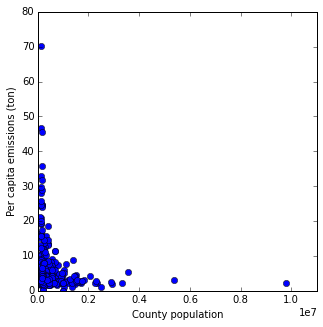

In [16]:
#Initial visualization of the data (Total population)
y = data['Per capita emissions']
x = data['2002 Population']
fig = figure(figsize = (5, 5))
plot(x, y, 'o')
ylim(0,80)
xlim(0,11000000)
plt.ylabel('Per capita emissions (ton)')
plt.xlabel('County population')

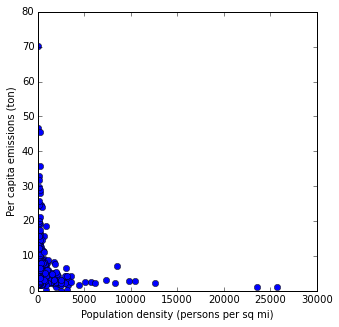

In [17]:
#Initial visualization of the data (Population density)
y1 = data['Per capita emissions']
x1 = data['Population density']
fig = figure(figsize = (5, 5))
plot(x1, y1, 'o')
ylim(0,80)
xlim(0,30000)
plt.ylabel('Per capita emissions (ton)')
plt.xlabel('Population density (persons per sq mi)')

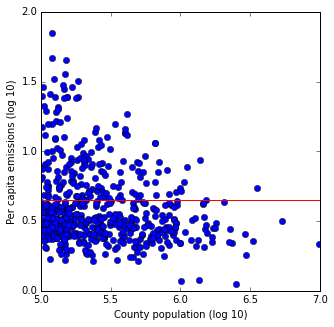

In [21]:
#Visualizing log-normalized data (Total population)
ylog = np.log10(y)
xlog = np.log10(x)
fig = figure(figsize = (5, 5))
plot(xlog, ylog, 'o')
XLR = arange(0, 45000, 0.1)
YLR = model.params[1]*XLR+model.params[0]
pl.plot(XLR, YLR, 'red')
ylim(0,2)
xlim(5,7)
plt.ylabel('Per capita emissions (log 10)')
plt.xlabel('County population (log 10)')

NameError: name 'model1' is not defined

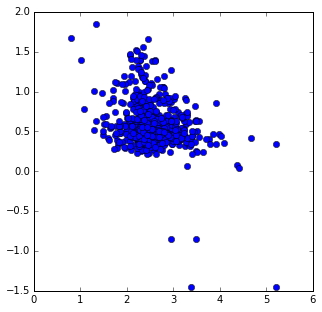

In [22]:
#Visualizing log-normalized data (Population density)
ylog1 = np.log10(y1)
xlog1 = np.log10(x1)
fig = figure(figsize = (5, 5))
plot(xlog1, ylog1, 'o')
XLR1 = arange(0, 45000, 0.1)
YLR1 = model1.params[1]*XLR1+model1.params[0]
pl.plot(XLR1, YLR1, 'red')
ylim(0, 2)
xlim(1, 5)
plt.ylabel('Per capita emissions (log 10)')
plt.xlabel('Population density (log 10)')

In [23]:
model0 = model = sm.OLS(data['Carbon emissions'], sm.add_constant(data['2002 Population']), mising='drop').fit()
print model0.summary()

                            OLS Regression Results                            
Dep. Variable:       Carbon emissions   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     776.0
Date:                Fri, 13 Nov 2015   Prob (F-statistic):          3.55e-107
Time:                        17:57:13   Log-Likelihood:                -947.30
No. Observations:                 552   AIC:                             1899.
Df Residuals:                     550   BIC:                             1907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.6486      0.068     

In [27]:
#Calculating 1-st degree regression (Total population)
model = sm.OLS(ylog, sm.add_constant(xlog), mising='drop').fit()
print model.summary()

                             OLS Regression Results                             
Dep. Variable:     Per capita emissions   R-squared:                       0.058
Model:                              OLS   Adj. R-squared:                  0.057
Method:                   Least Squares   F-statistic:                     34.14
Date:                  Fri, 13 Nov 2015   Prob (F-statistic):           8.79e-09
Time:                          17:57:23   Log-Likelihood:                -132.62
No. Observations:                   552   AIC:                             269.2
Df Residuals:                       550   BIC:                             277.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               1.

In [24]:
#Calculating 1-st degree regression (Population density)
model1 = sm.OLS(ylog1, sm.add_constant(xlog1), mising='drop').fit()
print model1.summary()

                             OLS Regression Results                             
Dep. Variable:     Per capita emissions   R-squared:                       0.109
Model:                              OLS   Adj. R-squared:                  0.107
Method:                   Least Squares   F-statistic:                     67.13
Date:                  Fri, 13 Nov 2015   Prob (F-statistic):           1.79e-15
Time:                          17:57:18   Log-Likelihood:                -117.45
No. Observations:                   552   AIC:                             238.9
Df Residuals:                       550   BIC:                             247.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const           

In [25]:
#Calculating 2-nd degree regression (Total population)
model2 = smf.ols(formula = 'y ~ x + I((x)) + I((x)**2)', 
        data={'x': np.log10(data['2002 Population']),'y': np.log10(data['Per capita emissions'])}).fit()
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     17.12
Date:                Fri, 13 Nov 2015   Prob (F-statistic):           6.11e-08
Time:                        17:57:19   Log-Likelihood:                -132.54
No. Observations:                 552   AIC:                             271.1
Df Residuals:                     549   BIC:                             284.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.8222      2.595      1.087      

In [26]:
#Calculating 2-nd degree regression (Population density)
model3 = smf.ols(formula = 'y ~ x + I((x)) + I((x)**2)', 
        data={'x': np.log10(data['Population density']),'y': np.log10(data['Per capita emissions'])}).fit()
print model3.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     34.99
Date:                Fri, 13 Nov 2015   Prob (F-statistic):           5.00e-15
Time:                        17:57:19   Log-Likelihood:                -116.13
No. Observations:                 552   AIC:                             238.3
Df Residuals:                     549   BIC:                             251.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.8455      0.173      4.898      

In [28]:
#Organizing Counties by descending order of per capita emissions
data = data.sort('Per capita emissions', ascending = False)
data.index = range(0, len(data.index))
data

,County/State,2002 Population,Carbon emissions,Area in sq mi,Per capita emissions,Population density
0,"San Juan, NM",120367,8.453822,5538.71,70.233715,21.731956
1,"Coconino, AZ",120295,5.632171,18662.57,46.819660,6.445790
2,"Porter, IN",150403,6.829558,521.64,45.408388,288.327199
3,"Monroe, MI",149253,5.346132,680.10,35.819263,219.457433
4,"Citrus, FL",123685,4.077883,773.24,32.969905,159.956805
5,"Calcasieu, LA",183344,5.848485,1094.42,31.898973,167.526178
6,"Berkeley, SC",145274,4.307215,1229.23,29.648903,118.182928
7,"St. Clair, MI",167712,4.866322,832.55,29.015943,201.443757
8,"Woodbury, IA",103331,2.986623,877.43,28.903452,117.765520
9,"Ouachita, LA",147342,4.119479,632.76,27.958618,232.856059


In [31]:
#Organizing Counties by descending order of per capita emissions
data = data.sort('Population density', ascending = False)
data.index = range(0, len(data.index))
print data['Per capita emissions'][542:551].mean()/data['Per capita emissions'].mean()
data

2.82556860577


,County/State,2002 Population,Carbon emissions,Area in sq mi,Per capita emissions,Population density
0,"Fairfax, VA",997580,0.035497,6.16,0.035583,161944.805195
1,"Fairfax, VA",997580,2.181548,6.16,2.186840,161944.805195
2,"New York, NY",1546856,3.989600,33.68,2.579167,45928.028504
3,"Kings, NY",2488194,2.762536,96.87,1.110257,25685.908950
4,"Bronx, NY",1354068,1.620503,57.42,1.196766,23581.818182
5,"Queens, NY",2237815,5.011067,177.35,2.239268,12618.071610
6,"Philadelphia, PA",1492231,4.153893,142.68,2.783680,10458.585646
7,"Hudson, NJ",611439,1.779753,62.26,2.910762,9820.735625
8,"Alexandria, VA",130804,0.944493,15.38,7.220674,8504.811443
9,"District of Columbia, DC",570898,1.260173,68.36,2.207352,8351.345816


In [ ]:
#Loading MSA data
msa = pd.read_csv('metrolist.csv')
msa.columns=['', 'MSA', '', 'County/State']
msa = msa[['MSA', 'County/State']]
msa

In [ ]:
#Creating MSA database with same indicators
msa_data = pd.merge(data, msa, how='left', on=['County/State'])
msa_data = msa_data[pd.notnull(msa_data['MSA'])] 
msa_data = msa_data[['MSA', '2002 Population', 'Carbon emissions', 'Area in sq mi']]
msa_data = msa_data.groupby(['MSA']).sum()
msa_data['MSA'] = msa_data.index
msa_data.index = range(0, len(msa_data['MSA']))
msa_data['Per capita emissions'] = msa_data['Carbon emissions']*1000000/msa_data['2002 Population']
msa_data['Population density'] = msa_data['2002 Population']/msa_data['Area in sq mi']
msa_data

In [ ]:
#Initial visualization of the data (Population density)
y2 = msa_data['Per capita emissions']
x2 = msa_data['Population density']
fig = figure(figsize = (8, 8))
plot(x2, y2, 'o')
ylim(0,80)
xlim(0,3000)
plt.ylabel('Per capita emissions (ton)')
plt.xlabel('Population density')

In [ ]:
#Visualizing log-normalized data (Population density)
ylog2 = np.log10(y2)
xlog2 = np.log10(x2)
fig = figure(figsize = (5, 5))
plot(xlog2, ylog2, 'o')
XLR2 = arange(0, 45000, 0.1)
YLR2 = model4.params[1]*XLR2+model4.params[0]
pl.plot(XLR2, YLR2, 'red')
ylim(0, 2)
xlim(1, 3.5)
plt.ylabel('Per capita emissions (log 10)')
plt.xlabel('MSA population density (log 10)')

In [ ]:
#Calculating 1-st degree regression (Population density)
model4 = sm.OLS(ylog2, sm.add_constant(xlog2), mising='drop').fit()
print model4.summary()

In [ ]:
#Calculating 2-nd degree regression (Population density)
model5 = smf.ols(formula = 'y ~ x + I((x)) + I((x)**2)', 
        data={'x': np.log10(msa_data['Population density']),'y': np.log10(msa_data['Per capita emissions'])}).fit()
print model5.summary()

In [ ]:
plot(data.index, data['Emissions vs. Avg'], 'o')
ylim(0,2)